## The purpose of this file
Make an aggregate adjacency matrix and save it.
> Be sure to add $\tau$ (the number of snapshots you make) to the filename.

In [1]:
import sys
sys.path.append('../')
import powerlaw
import pandas as pd
import networkx as nx
import toolbox as tb
%matplotlib inline

In [2]:
tag = "shinkaimakoto"
hashtag = "新海誠"
timespan = "21-29"
file = f"../data/datasets/{tag}/{tag}_{timespan}.pkl"
df = tb.get_dataframe(hashtag, file)

start = "2022-11-21T00:00+09:00"
end = "2022-11-22T23:59+09:00"
timespan = "21-22"
start = pd.to_datetime(start)
end = pd.to_datetime(end)
DF = df[(start <= df.index) & (df.index <= end)]

In [3]:
DF = df.copy()
DF.shape

(2841, 4)

In [4]:
#tau, snapshots = tb.get_snapshots_closed_intervals(DF, 'hours=1')
tau, snapshots = tb.get_snapshots_closed_intervals(DF, 'minutes=15')
print(f"tau = {tau}")

tau = 855


In [5]:
edgelst_of_snapshots = tb.get_edgelist_of_eachsnapshot(df,tau, snapshots)
filename = f'../data/graph_data/{tag}/original/{hashtag}_{timespan}_{tau}_aam'
print(filename)
G = tb.make_aggregate_adjacency_matrix(edgelst_of_snapshots, fname=filename)
#G = tb.make_aggregate_adjacency_matrix(edgelst_of_snapshots)

../data/graph_data/shinkaimakoto/original/新海誠_21-29_855_aam


In [12]:
G.number_of_nodes()

9208

In [6]:
tb.check_degree(G)

singleton:[]


,degree
新海誠,9207
すずめの戸締まり,7086
映画,3855
映画鑑賞,1384
君の名は,1357
...,...
大人になるまですずめはカラスの子供だと思ってた人と繋がりたい,1
空模様,1
今を大切に,1
iameiga_天気の子,1


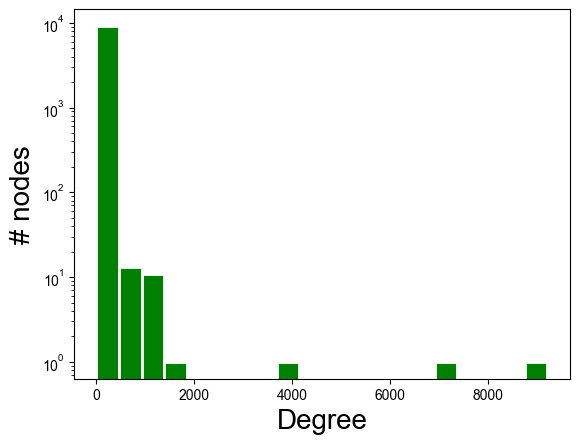

In [7]:
tb.plot_dd(G, 20)

In [8]:
tb.fit_power_law(G)

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.544881468812118, 
its standard error sigma: 0.047316930247710345, 
k_min: 37.0


(2.544881468812118, 0.047316930247710345, 37.0)

In [9]:
tb.compare_distribution(G,"power_law", "exponential")

Calculating best minimal value for power law fit
------------------------------------------------
The power_law distribution outperforms exponential distribution with significance level 3.057940871386762e-05.


In [10]:
tb.compare_distribution(G,"power_law", "lognormal")

Calculating best minimal value for power law fit
------------------------------------------------
The lognormal distribution outperforms power_law distribution with significance level 0.1768520835159595.


C:\Users\yuki\Desktop\github\Instagram-Trend-Analysis\.venv\lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.544881468812118, 
its standard error sigma: 0.047316930247710345, 
k_min: 37.0


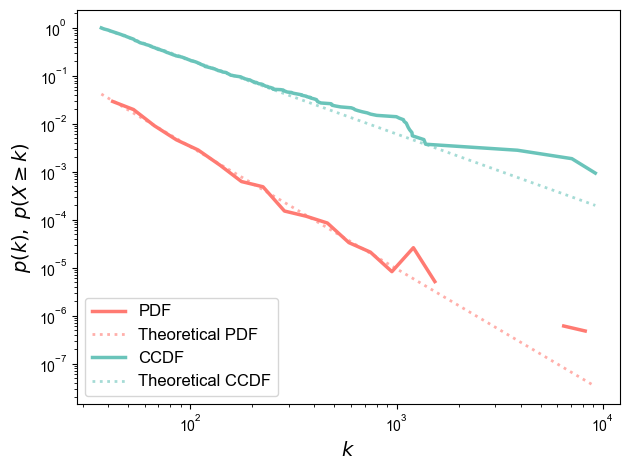

In [11]:
tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA")